In [1]:
import numpy as np
import pandas as pd
import wrds
import datetime as dt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/final_data/outsamp_rob_outputs.csv")
df.returns = df.returns/3
df.label = df.label.str.lower()
df.loc[df.label=="negative",'r_score'] = df.score
df.loc[df.label=="positive",'r_score'] = 1-df.score
df = df[df.sentiment!='neutral']

In [3]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
ticks = df.compname.unique().tolist()
weeks = df.week.unique().tolist()

In [5]:
mktcap = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/mktcap2016.csv")
mktcap.sort_values(by="Market Capitalization", inplace=True, ascending=False)
mktcap = mktcap.loc[mktcap['Ticker Name'].isin(ticks)]
mktcap.reset_index(drop=True, inplace=True)

In [6]:
cap = mktcap['Market Capitalization'].sum()
for i in range(len(mktcap["Ticker Name"])):
#     temp = df[df.compname==i]
#     temp.loc['']
#     df.loc[df.compname==mktcap["Ticker Name"][i], 'vw'] = mktcap['Market Capitalisation'][i]/cap
    df.loc[df.compname==mktcap["Ticker Name"][i], 'mkt_cap'] = mktcap['Market Capitalization'][i]

In [7]:
df['Rank'] = df.groupby(['week'])['r_score'].rank(method='first')

In [8]:
df

,Unnamed: 0.1,Unnamed: 0,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname,label,score,r_score,mkt_cap,Rank
0,0,0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-1.621247,3.253156,positive,1,PFE,positive,0.340947,0.659053,1.972434e+08,8.0
1,3,3,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-2.127243,-0.742992,negative,2,BMY,positive,0.343860,0.656140,1.118252e+08,1.0
2,4,4,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.264329,0.372423,positive,1,GSK,positive,0.343027,0.656973,1.601124e+07,4.0
3,5,5,1,04/01/16,22/01/16,present goldman sach healthcar ceo unscript vi...,present goldman sach healthcar ceo unscript vi...,-0.927682,1.264571,positive,1,MRK,positive,0.341132,0.658868,1.466051e+08,7.0
4,8,8,1,04/01/16,22/01/16,scientif corpor earn call feb.scientif corpor ...,scientif corpor earn call feb scientif corpor ...,-1.066556,-3.176648,negative,2,BSX,positive,0.342940,0.657060,2.420006e+07,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,7252,7252,363,12/12/22,30/12/22,cardin announc execut chang effect februari.,cardin announc execut chang effect februari,-0.079186,0.988233,positive,1,CAH,positive,0.346050,0.653950,2.893388e+07,2.0
4216,7255,7255,363,12/12/22,30/12/22,cv corpor earn call feb.hmg strategi llc centr...,cv corpor earn call feb hmg strategi llc centr...,-2.774265,3.403083,positive,1,CVS,positive,0.346737,0.653263,1.068118e+08,1.0
4217,7257,7257,363,12/12/22,30/12/22,gsk plc announc new global headquart central l...,gsk plc announc new global headquart central l...,-0.769113,2.055391,positive,1,GSK,positive,0.342595,0.657405,1.601124e+07,6.0
4218,7258,7258,363,12/12/22,30/12/22,bristol myer squibb announc first disclosur ne...,bristol myer squibb announc first disclosur ne...,-2.909204,1.042762,positive,1,BMY,positive,0.342306,0.657694,1.118252e+08,7.0


In [9]:
df_pos = df[df.label=="positive"]
# df_neg = df[df.label!="positive"]
df_pos['Rank'] = df_pos.groupby(['week', 'label'])['score'].rank(method='first', ascending=False)
# df_neg['Rank'] = df_neg.groupby(['week'])['score'].rank(method='first', ascending=False)

In [10]:
mktcap['Market Capitalization'].sum()

1786551310.65

In [11]:
# df.vw[df.week==5]

In [12]:
def get_portfolio_long_ew(frame):
    stdev= []
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        weights = 1/len(mid_df)
        intm = mid_df.returns*weights
        returns = sum(intm)
#         returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

# fig = plt.figure()
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax1.plot(get_portfolio_long_ew(df))
# ax1.set_xlabel('Date')
# ax1.set_ylabel("Cumulative Returns")
# ax1.set_title("Long Portfolio Cumulative Returns")
# plt.show()

In [13]:
def get_portfolio_short_ew(frame):
    stdev = []
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        weights = 1/len(mid_df)
        intm = mid_df.returns*weights
        returns = sum(intm)
#         returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

In [14]:
def get_portfolio_long_vw(frame):
    stdev = []
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        intm = mid_df.returns*weights
        returns = sum(intm)
#         returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 
# get_portfolio_long_vw(df_pos)

In [15]:
def get_portfolio_short_vw(frame):
    stdev = []
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        intm = mid_df.returns*weights
        stdev.append(np.std(intm))
        returns = sum(intm)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret)
    return ret
# get_portfolio_long_vw(df)

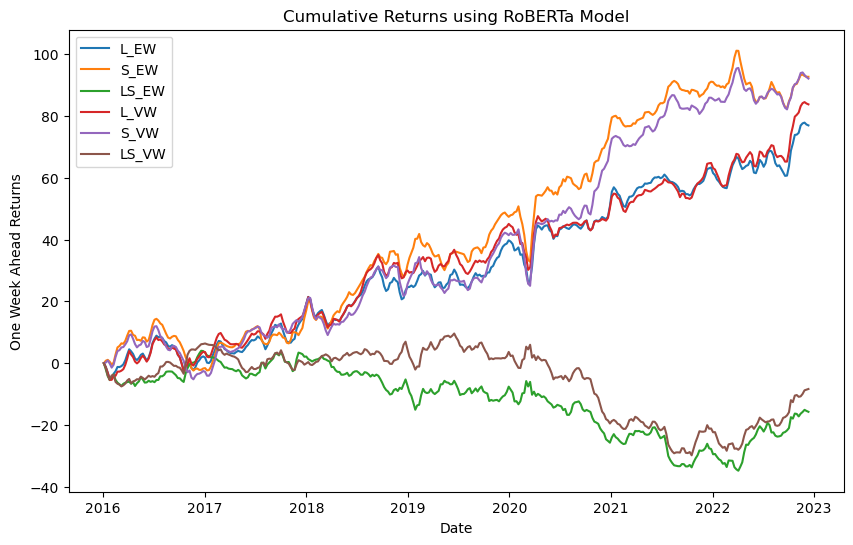

In [16]:
df['FROM'] = pd.to_datetime(df['FROM'], format='%d/%m/%y')
l_ew = pd.Series(get_portfolio_long_ew(df_pos))
s_ew = pd.Series(get_portfolio_short_ew(df))
ls_ew = l_ew+(-1*s_ew)
l_vw = pd.Series(get_portfolio_long_vw(df_pos))
s_vw = pd.Series(get_portfolio_short_vw(df))
ls_vw = l_vw+(-1*s_vw)
yrs = pd.DatetimeIndex(df['FROM']).unique().tolist()
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the lines
# Plot the lines
plt.plot(yrs, np.cumsum(l_ew), label='L_EW')
plt.plot(yrs, np.cumsum(s_ew), label='S_EW')
plt.plot(yrs, np.cumsum(ls_ew), label='LS_EW')
plt.plot(yrs, np.cumsum(l_vw), label='L_VW')
plt.plot(yrs, np.cumsum(s_vw), label='S_VW')
plt.plot(yrs, np.cumsum(ls_vw), label='LS_VW')
plt.xlabel('Date')  # Replace with your actual x-axis label
plt.ylabel('One Week Ahead Returns')
plt.title('Cumulative Returns using RoBERTa Model')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [17]:
print("Accuracy score for finbert model = ", accuracy_score(df.sentiment,df.label.fillna('')))

Accuracy score for finbert model =  0.5367298578199052


In [18]:
port_vals = pd.DataFrame(columns=['avg', 'stdev', 'std_downside', 'sharpe_ratio', 'sortino_ratio','ff3_alpha', 'ff3_r2', 'ff5_alpha', 'ff5_r2'])

In [19]:
avg = [np.mean(l_ew)] + [np.mean(s_ew)] + [np.mean(ls_ew)] + [np.mean(l_vw)] + [np.mean(s_vw)] + [np.mean(ls_vw)] 
stdev = [np.std(l_ew)] + [np.std(s_ew)] + [np.std(ls_ew)] + [np.std(l_vw)] + [np.std(s_vw)] + [np.std(ls_vw)]

In [20]:
downside = [np.std(l_ew[l_ew < 0]), np.std(s_ew[s_ew < 0]), np.std(ls_ew[ls_ew < 0]),np.std(l_vw[l_vw < 0]),
            np.std(s_vw[s_vw < 0]), np.std(ls_vw[ls_vw < 0])]

In [21]:
port_vals['avg'] = avg
port_vals['stdev'] = stdev
port_vals['std_downside'] = downside

In [22]:
new_index = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']
port_vals = port_vals.set_index(pd.Index(new_index))

In [23]:
for i in range(len(port_vals)):
    port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.stdev[i]
    port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.std_downside[i]
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/2852972423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.stdev[i]
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/2852972423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.std_downside[i]


,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.211837,1.389035,0.836786,0.146747,0.243595,NaN,NaN,NaN,NaN
s_ew,0.255141,1.486749,0.933482,0.166229,0.264751,NaN,NaN,NaN,NaN
ls_ew,-0.043303,1.096582,0.683256,-0.046785,-0.075087,NaN,NaN,NaN,NaN
l_vw,0.230591,1.358314,0.835412,0.163873,0.266445,NaN,NaN,NaN,NaN
s_vw,0.253568,1.456843,0.921370,0.168562,0.266525,NaN,NaN,NaN,NaN
ls_vw,-0.022977,1.094274,0.692059,-0.028308,-0.044761,NaN,NaN,NaN,NaN


In [24]:
ff3 = pd.read_csv("ff3.csv")
ff3.date = pd.to_datetime(ff3['date'], format='%d/%m/%y')
ff3.set_index('date', inplace=True)

start = []
weekly_first_days = ff3.resample('W-MON').first()

weekly_first_days = weekly_first_days.dropna()

start = weekly_first_days.index.strftime('%d/%m/%y').tolist()
start_list = start[:-1]

end = []
weekly_last_days = ff3.resample('W-FRI').last()

weekly_last_days = weekly_last_days.dropna()

end_list = weekly_last_days.index.strftime('%d/%m/%y').tolist()
weekly_df = pd.DataFrame(columns=[['FROM'] +['TO']])
start_list = pd.to_datetime(start_list, format='%d/%m/%y')
end_list = pd.to_datetime(end_list, format='%d/%m/%y')
start_list = start_list.sort_values()
end_list = end_list.sort_values()

In [25]:
cols = ff3.columns.tolist()

weekly_df = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff3[(ff3.index >= start_date) & (ff3.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df = pd.concat([weekly_df, data])
weekly_df['date'] = start_list
weekly_df

,mktrf,smb,hml,rf,umd,date
0,-0.0637,-0.0198,0.0058,0.00000,0.0141,2016-01-04
0,-0.0250,-0.0137,-0.0020,0.00000,0.0253,2016-01-11
0,0.0140,0.0023,-0.0155,0.00000,-0.0126,2016-01-18
0,0.0176,-0.0052,0.0359,0.00000,-0.0160,2016-01-25
0,-0.0337,-0.0150,0.0109,0.00005,-0.0357,2016-02-01
...,...,...,...,...,...,...
0,0.0129,0.0124,-0.0250,0.00074,-0.0209,2022-11-28
0,-0.0380,-0.0131,-0.0055,0.00080,0.0093,2022-12-05
0,-0.0208,0.0004,0.0021,0.00080,0.0101,2022-12-12
0,-0.0037,-0.0093,0.0286,0.00080,0.0458,2022-12-19


In [26]:
weekly = weekly_df.loc[weekly_df['date'].isin(df.FROM.unique())]
weekly.reset_index(drop=True, inplace=True)

weekly['l_ew'] = l_ew
weekly['s_ew'] = s_ew
weekly['ls_ew'] = ls_ew
weekly['l_vw'] = l_vw
weekly['s_vw'] = s_vw
weekly['ls_vw'] = ls_vw

weekly

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/1357161703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/1357161703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/1357161703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,mktrf,smb,hml,rf,umd,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0198,0.0058,0.00000,0.0141,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0137,-0.0020,0.00000,0.0253,2016-01-11,-1.224023,0.802575,-2.026598,-1.314745,0.235307,-1.550052
2,0.0140,0.0023,-0.0155,0.00000,-0.0126,2016-01-18,-1.881111,0.276652,-2.157764,-1.799560,0.631772,-2.431332
3,0.0176,-0.0052,0.0359,0.00000,-0.0160,2016-01-25,-1.874790,-0.594598,-1.280192,-2.265284,-0.978151,-1.287133
4,-0.0337,-0.0150,0.0109,0.00005,-0.0357,2016-02-01,0.041660,-0.929433,0.971093,0.000646,-1.312242,1.312888
...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0157,0.0078,0.00070,0.0580,2022-11-14,2.360954,1.468511,0.892443,2.047997,1.904100,0.143897
359,0.0143,-0.0063,0.0093,0.00056,0.0037,2022-11-21,0.697536,0.151091,0.546445,0.976809,0.194404,0.782405
360,0.0129,0.0124,-0.0250,0.00074,-0.0209,2022-11-28,0.244980,-0.448167,0.693147,0.347704,-0.821187,1.168891
361,-0.0380,-0.0131,-0.0055,0.00080,0.0093,2022-12-05,-0.619174,-0.262890,-0.356284,-0.448770,-0.665433,0.216663


In [27]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly[['mktrf', 'smb', 'hml','umd']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff3_alpha[i] = model.params['const']
    port_vals.ff3_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/3896336128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/3896336128.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/3896336128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.211837,1.389035,0.836786,0.146747,0.243595,0.173765,11.00754,NaN,NaN
s_ew,0.255141,1.486749,0.933482,0.166229,0.264751,0.202063,17.41055,NaN,NaN
ls_ew,-0.043303,1.096582,0.683256,-0.046785,-0.075087,-0.028298,2.436662,NaN,NaN
l_vw,0.230591,1.358314,0.835412,0.163873,0.266445,0.196355,9.311856,NaN,NaN
s_vw,0.253568,1.456843,0.921370,0.168562,0.266525,0.202755,15.864002,NaN,NaN
ls_vw,-0.022977,1.094274,0.692059,-0.028308,-0.044761,-0.0064,3.552849,NaN,NaN


In [28]:
ff5 = pd.read_csv("ff5.csv")
ff5.date = pd.to_datetime(ff5['date'], format='%d/%m/%y')
ff5.set_index('date', inplace=True)
# cols = ff3.columns.tolist()
weekly_df_ff5 = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff5[(ff5.index >= start_date) & (ff5.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df_ff5 = pd.concat([weekly_df_ff5, data])
weekly_df_ff5['date'] = start_list
weekly_ff5 = weekly_df_ff5.loc[weekly_df_ff5['date'].isin(df.FROM.unique())]
weekly_ff5.reset_index(drop=True, inplace=True)

weekly_ff5['l_ew'] = l_ew
weekly_ff5['s_ew'] = s_ew
weekly_ff5['ls_ew'] = ls_ew
weekly_ff5['l_vw'] = l_vw
weekly_ff5['s_vw'] = s_vw
weekly_ff5['ls_vw'] = ls_vw
weekly_ff5

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/3423993167.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/3423993167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/3423993167.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,mktrf,smb,hml,rf,umd,rmw,cma,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0204,0.0058,0.00000,0.0141,0.0129,0.0117,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0136,-0.0020,0.00000,0.0253,0.0075,0.0063,2016-01-11,-1.224023,0.802575,-2.026598,-1.314745,0.235307,-1.550052
2,0.0140,-0.0001,-0.0155,0.00000,-0.0126,0.0040,-0.0029,2016-01-18,-1.881111,0.276652,-2.157764,-1.799560,0.631772,-2.431332
3,0.0176,-0.0029,0.0359,0.00000,-0.0160,0.0055,0.0149,2016-01-25,-1.874790,-0.594598,-1.280192,-2.265284,-0.978151,-1.287133
4,-0.0337,-0.0115,0.0109,0.00005,-0.0357,0.0206,0.0153,2016-02-01,0.041660,-0.929433,0.971093,0.000646,-1.312242,1.312888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0123,0.0078,0.00070,0.0580,0.0294,0.0219,2022-11-14,2.360954,1.468511,0.892443,2.047997,1.904100,0.143897
359,0.0143,-0.0056,0.0093,0.00056,0.0037,0.0027,0.0042,2022-11-21,0.697536,0.151091,0.546445,0.976809,0.194404,0.782405
360,0.0129,0.0060,-0.0250,0.00074,-0.0209,-0.0099,-0.0061,2022-11-28,0.244980,-0.448167,0.693147,0.347704,-0.821187,1.168891
361,-0.0380,-0.0135,-0.0055,0.00080,0.0093,0.0142,0.0097,2022-12-05,-0.619174,-0.262890,-0.356284,-0.448770,-0.665433,0.216663


In [29]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly_ff5[['mktrf', 'smb', 'hml','umd']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly_ff5[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff5_alpha[i] = model.params['const']
    port_vals.ff5_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/149249534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/149249534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39250/149249534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.211837,1.389035,0.836786,0.146747,0.243595,0.173765,11.00754,0.174133,11.052124
s_ew,0.255141,1.486749,0.933482,0.166229,0.264751,0.202063,17.41055,0.202335,17.391643
ls_ew,-0.043303,1.096582,0.683256,-0.046785,-0.075087,-0.028298,2.436662,-0.028202,2.398445
l_vw,0.230591,1.358314,0.835412,0.163873,0.266445,0.196355,9.311856,0.196674,9.342082
s_vw,0.253568,1.456843,0.921370,0.168562,0.266525,0.202755,15.864002,0.202909,15.806249
ls_vw,-0.022977,1.094274,0.692059,-0.028308,-0.044761,-0.0064,3.552849,-0.006236,3.5128


In [30]:
port_final = port_vals.copy()
port_final.sharpe_ratio = port_final.sharpe_ratio*np.sqrt(52)
port_final.stdev = port_final.stdev*np.sqrt(52)
port_final.avg = (((1+port_final.avg)**(1/52))-1)*52*100
port_final.sortino_ratio = port_final.sortino_ratio*np.sqrt(52)

In [31]:
port_final

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,19.249294,10.016475,0.836786,1.05821,1.756592,0.173765,11.00754,0.174133,11.052124
s_ew,22.774482,10.721102,0.933482,1.198693,1.909149,0.202063,17.41055,0.202335,17.391643
ls_ew,-4.425009,7.907566,0.683256,-0.33737,-0.541457,-0.028298,2.436662,-0.028202,2.398445
l_vw,20.790924,9.794941,0.835412,1.181706,1.921362,0.196355,9.311856,0.196674,9.342082
s_vw,22.648599,10.505447,0.921370,1.215518,1.921941,0.202755,15.864002,0.202909,15.806249
ls_vw,-2.324007,7.890920,0.692059,-0.204135,-0.322776,-0.0064,3.552849,-0.006236,3.5128


In [32]:
port_final.to_csv("Rob_port_vals.csv")

In [33]:
from sklearn.metrics import precision_score

print("Precision score for outsample data roberta model = ", precision_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data roberta model =  0.2880789402753757


/Users/dhruvishah/Desktop/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import recall_score

In [35]:
print("Precision score for outsample data finbert model = ", recall_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.5367298578199052


In [36]:
from sklearn.metrics import f1_score

print("Precision score for outsample data finbert model = ", f1_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.37492463468375803


In [37]:
print('l',np.cumsum(l_ew)[-1:],'\n')
print('s',np.cumsum(s_ew)[-1:],'\n')
print('ls',np.cumsum(ls_ew)[-1:],'\n')
print('l vw',np.cumsum(l_vw)[-1:],'\n')
print('s vw',np.cumsum(s_vw)[-1:],'\n')
print('ls vw',np.cumsum(ls_vw)[-1:],'\n')

l 362    76.896894
dtype: float64 

s 362    92.616014
dtype: float64 

ls 362   -15.71912
dtype: float64 

l vw 362    83.704607
dtype: float64 

s vw 362    92.045322
dtype: float64 

ls vw 362   -8.340715
dtype: float64 



In [39]:
s_vw = pd.DataFrame(np.cumsum(s_vw))
s_vw.to_csv('rob_sv.csv')

In [41]:
combined = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/bert_lv.csv")

In [42]:
combined

,bert,fin,lm,rob
0,0.000000,0.000000,0.000000,0.000000
1,-0.199065,0.029254,-0.900736,0.235307
2,-0.482338,0.008442,-3.277000,1.102386
3,-2.202088,-1.309749,-6.823533,0.991314
4,-2.489841,-1.946560,-9.711884,-0.432000
...,...,...,...,...
358,87.415362,92.788202,14726.686430,13802.083410
359,87.667936,92.838586,14820.209550,13896.107910
360,87.117923,92.888644,14913.908350,13989.311220
361,86.192252,92.799836,15006.210200,14081.849100


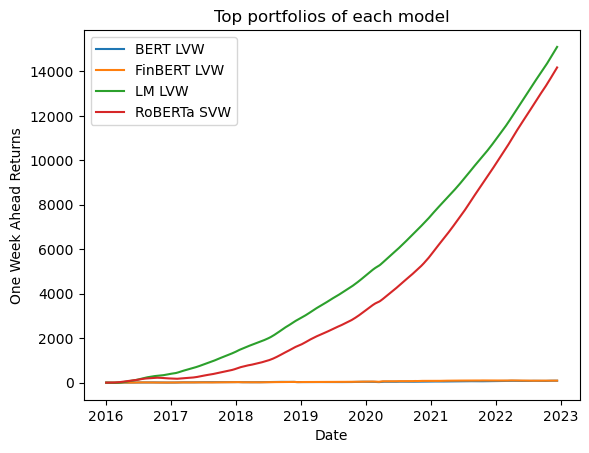

In [43]:
plt.plot(yrs, combined.bert, label='BERT LVW')
plt.plot(yrs, combined.fin, label='FinBERT LVW')
plt.plot(yrs, combined.lm, label='LM LVW')
plt.plot(yrs, combined.rob, label='RoBERTa SVW')
plt.xlabel('Date')  # Replace with your actual x-axis label
plt.ylabel('One Week Ahead Returns')
plt.title('Top portfolios of each model')
plt.legend()

# Show the plot
plt.show()